In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from plotly.subplots import make_subplots 
from datetime import datetime 

In [2]:
covid_df=pd.read_csv('worldometer_coronavirus_summary_data.csv')

In [3]:
covid_df.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945
2,Algeria,Africa,265816,6875.0,178371.0,80570.0,6.0,5865,152.0,230861.0,5093.0,45325517
3,Andorra,Europe,42156,153.0,41021.0,982.0,14.0,543983,1974.0,249838.0,3223924.0,77495
4,Angola,Africa,99194,1900.0,97149.0,145.0,NaN,2853,55.0,1499795.0,43136.0,34769277


In [4]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         226 non-null    object 
 1   continent                       226 non-null    object 
 2   total_confirmed                 226 non-null    int64  
 3   total_deaths                    218 non-null    float64
 4   total_recovered                 204 non-null    float64
 5   active_cases                    204 non-null    float64
 6   serious_or_critical             145 non-null    float64
 7   total_cases_per_1m_population   226 non-null    int64  
 8   total_deaths_per_1m_population  218 non-null    float64
 9   total_tests                     212 non-null    float64
 10  total_tests_per_1m_population   212 non-null    float64
 11  population                      226 non-null    int64  
dtypes: float64(7), int64(3), object(2)
m

In [5]:
covid_df.describe()

,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
count,2.260000e+02,2.180000e+02,2.040000e+02,2.040000e+02,145.000000,226.000000,218.000000,2.120000e+02,2.120000e+02,2.260000e+02
mean,2.305651e+06,2.884442e+04,2.256851e+06,6.861029e+04,269.482759,148156.809735,1157.550459,2.987445e+07,1.944650e+06,3.495521e+07
std,7.575510e+06,9.971254e+04,7.613357e+06,2.350430e+05,883.174727,155202.909225,1212.833590,1.079635e+08,3.318400e+06,1.390338e+08
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000,16.000000,2.000000,5.117000e+03,5.093000e+03,8.050000e+02
25%,2.412600e+04,2.370000e+02,1.619300e+04,2.397500e+02,5.000000,11748.250000,172.500000,3.472968e+05,1.667260e+05,5.605125e+05
50%,1.793750e+05,2.251500e+03,1.372740e+05,1.634000e+03,17.000000,98271.500000,768.000000,2.238918e+06,7.753355e+05,5.800570e+06
75%,1.090902e+06,1.400650e+04,1.006245e+06,1.929675e+04,139.000000,255632.750000,1850.000000,1.233862e+07,2.267408e+06,2.187284e+07
max,8.420947e+07,1.026646e+06,8.124426e+07,1.938567e+06,8318.000000,704302.000000,6297.000000,1.016883e+09,2.184247e+07,1.439324e+09


In [6]:
columns_to_drop = ['total_tests', 'total_tests_per_1m_population', 'population']
covid_df = covid_df.drop(columns=columns_to_drop, errors='ignore')


In [7]:
covid_df.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0
2,Algeria,Africa,265816,6875.0,178371.0,80570.0,6.0,5865,152.0
3,Andorra,Europe,42156,153.0,41021.0,982.0,14.0,543983,1974.0
4,Angola,Africa,99194,1900.0,97149.0,145.0,NaN,2853,55.0


In [8]:
null_values = covid_df.isnull()
print(null_values)



     country  continent  total_confirmed  total_deaths  total_recovered  \
0      False      False            False         False            False   
1      False      False            False         False            False   
2      False      False            False         False            False   
3      False      False            False         False            False   
4      False      False            False         False            False   
..       ...        ...              ...           ...              ...   
221    False      False            False         False            False   
222    False      False            False         False            False   
223    False      False            False         False            False   
224    False      False            False         False            False   
225    False      False            False         False            False   

     active_cases  serious_or_critical  total_cases_per_1m_population  \
0           False         

In [9]:
column_null_counts = covid_df.isnull().sum()
print(column_null_counts)

country                            0
continent                          0
total_confirmed                    0
total_deaths                       8
total_recovered                   22
active_cases                      22
serious_or_critical               81
total_cases_per_1m_population      0
total_deaths_per_1m_population     8
dtype: int64


In [10]:
covid_df.dropna(subset=['total_recovered', 'active_cases', 'serious_or_critical'], inplace=True)


In [11]:
column_non_null_counts = covid_df.count()
print(column_non_null_counts)


country                           132
continent                         132
total_confirmed                   132
total_deaths                      132
total_recovered                   132
active_cases                      132
serious_or_critical               132
total_cases_per_1m_population     132
total_deaths_per_1m_population    132
dtype: int64


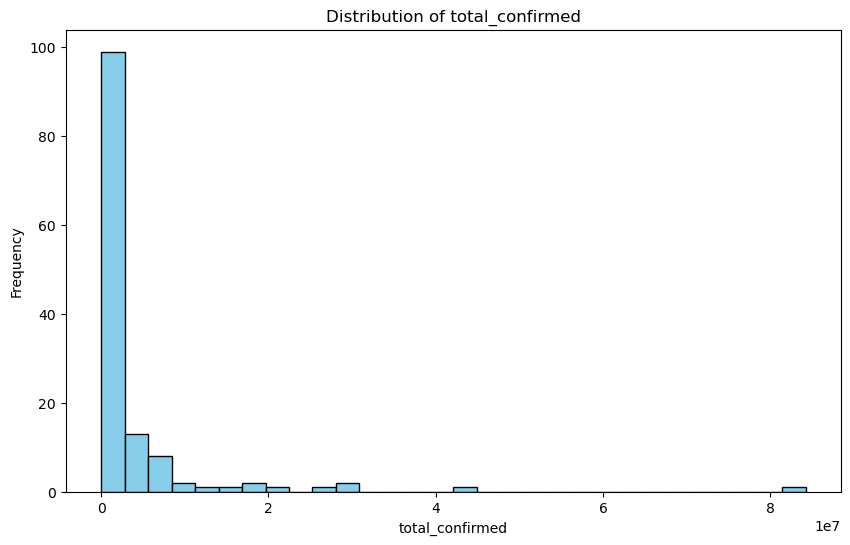

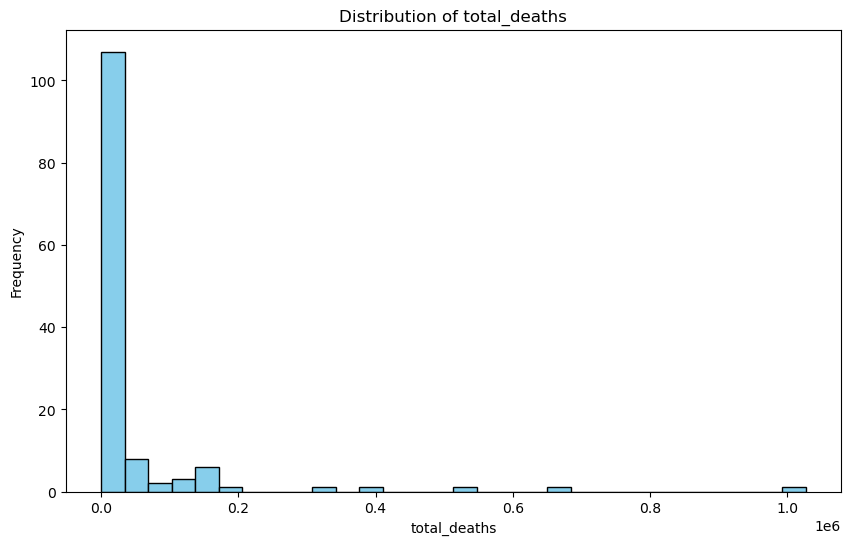

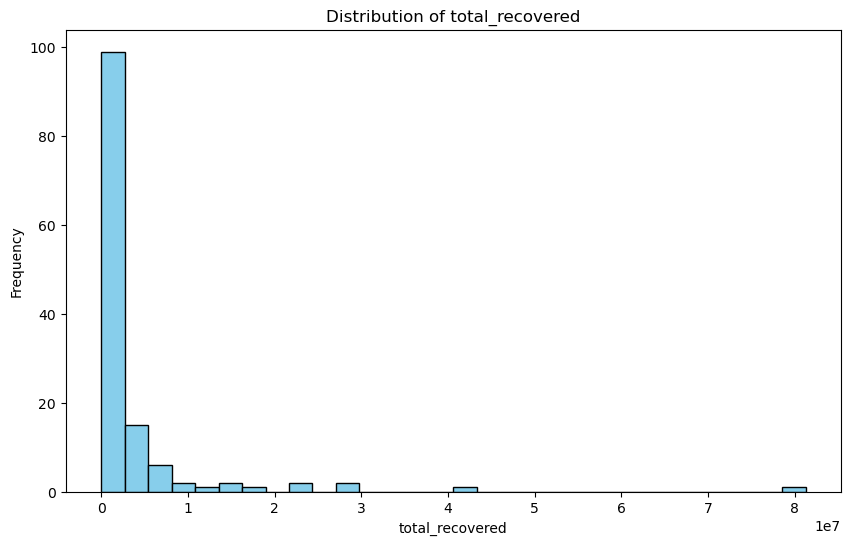

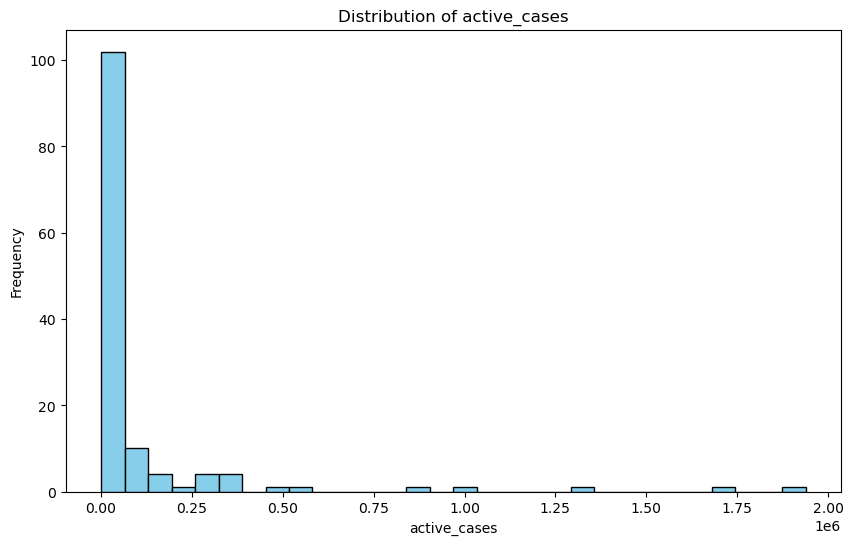

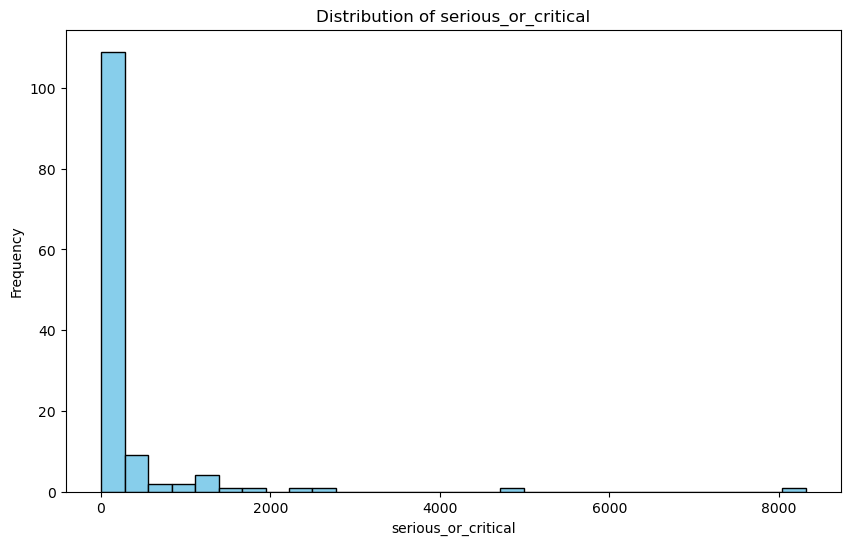

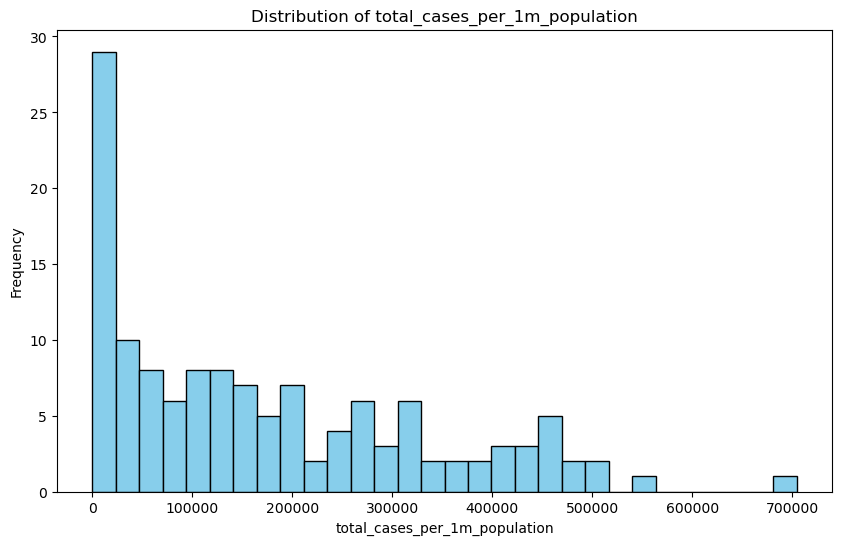

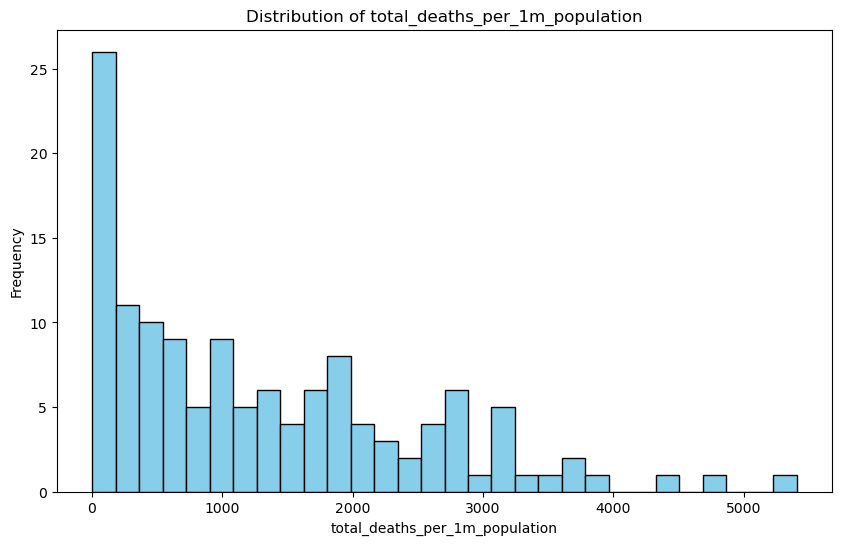

In [12]:
# Get numeric columns
numeric_columns = covid_df.select_dtypes(include=['int64', 'float64']).columns

# histograms for each numeric column(data visualization)
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    plt.title(f'Distribution of {column}')
    plt.hist(covid_df[column].dropna(), bins=30, color='skyblue', edgecolor='black')  # dropna() is used to remove any NaN values
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [13]:
countrywise=pd.pivot_table(covid_df,values=["total_deaths","total_recovered","total_confirmed"],index="country",aggfunc=max)

In [14]:
countrywise["recovery_rate"]=countrywise["total_recovered"]*100/countrywise["total_confirmed"]

In [15]:
countrywise["mortality_rate"]=countrywise["total_deaths"]*100/countrywise["total_confirmed"]

In [16]:
countrywise=countrywise.sort_values(by="total_confirmed",ascending=False)

In [17]:
countrywise.style.background_gradient(cmap="cubehelix")

,total_confirmed,total_deaths,total_recovered,recovery_rate,mortality_rate
country,,,,,
USA,84209473,1026646.000000,81244260.000000,96.478766,1.219157
India,43121599,524214.000000,42579693.000000,98.743307,1.215665
Brazil,30682094,664920.000000,29718402.000000,96.859106,2.167127
France,29160802,147257.000000,28156674.000000,96.556583,0.504983
Germany,25780226,137919.000000,23956700.000000,92.926649,0.534980
UK,22159805,176708.000000,21677896.000000,97.825301,0.797426
Russia,18260293,377670.000000,17647179.000000,96.642365,2.068258
Italy,17057873,165244.000000,15894511.000000,93.179912,0.968726
Turkey,15053168,98890.000000,14951238.000000,99.322867,0.656938


Darker colors typically represent lower numerical values.
Intermediate colors represent values in between.
Lighter colors  typically represent higher numerical values.
highest mortality rate is of mexico 
lowest recovery rate is of martinique

In [18]:
#top 10 active cases
top_10=covid_df.groupby(by='country').max()[['active_cases']].sort_values(by=['active_cases'],ascending=False).reset_index()

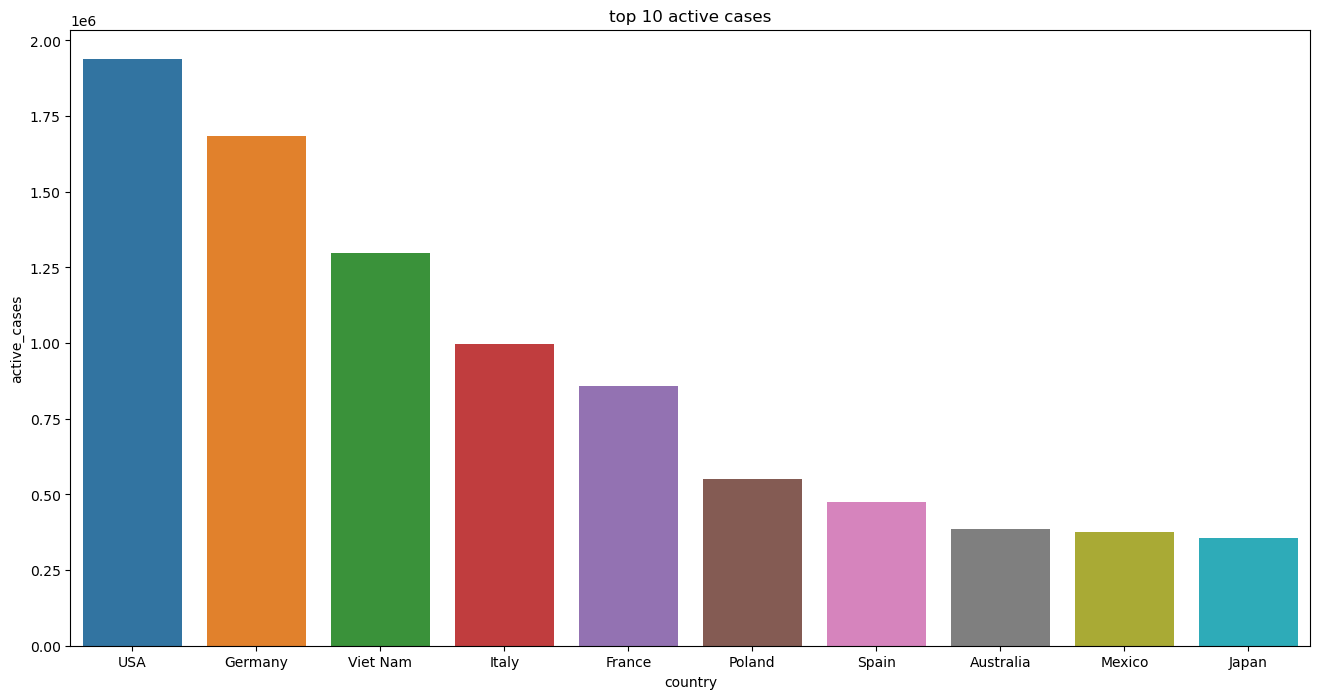

In [19]:
plt.figure(figsize=(16,8))
plt.title('top 10 active cases')
sns.barplot(data=top_10.iloc[:10],y="active_cases",x="country",linewidth=2)
plt.show()

usa has the highest active cases 

In [20]:
#top_20 countries with highest death 
top_20=covid_df.groupby(by='country').max()[['total_deaths']].sort_values(by=['total_deaths'],ascending=False).reset_index()
top_20.columns

Index(['country', 'total_deaths'], dtype='object')

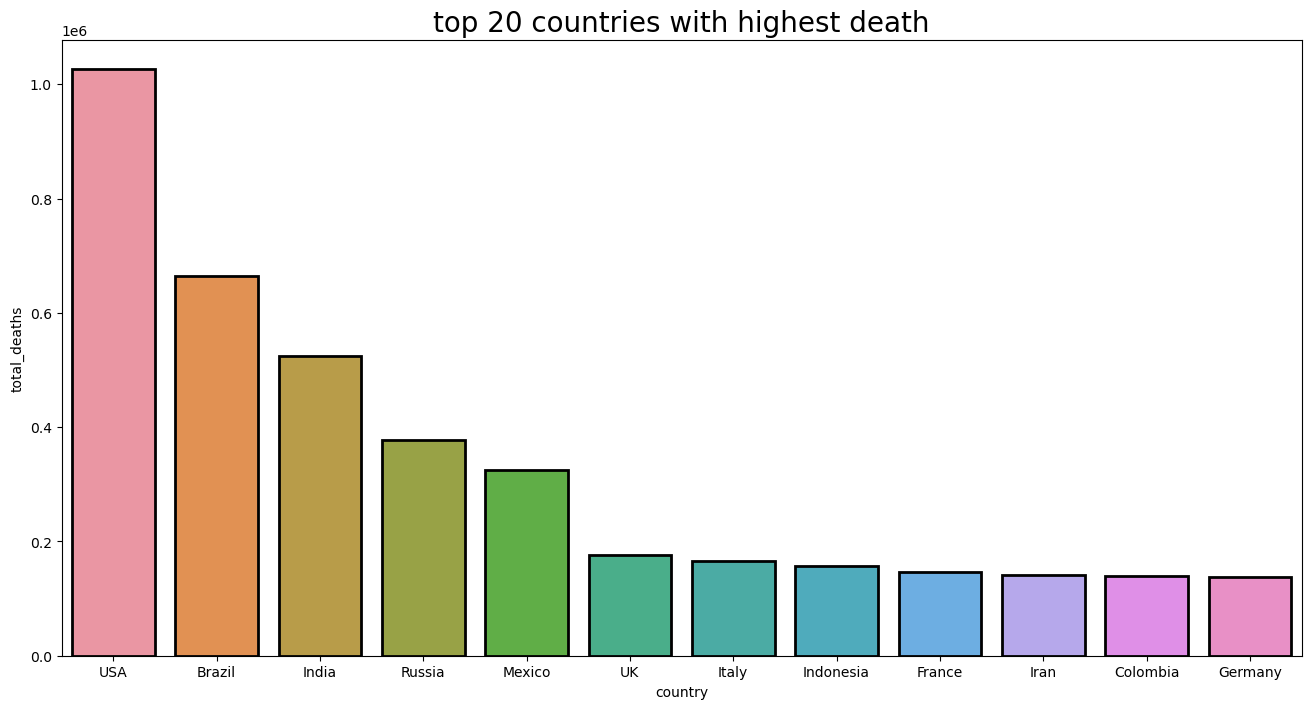

In [21]:
plt.figure(figsize=(16,8))
plt.title('top 20 countries with highest death',fontsize=20)
sns.barplot(data=top_20.iloc[:12],y='total_deaths',x='country',linewidth=2,edgecolor='black')
plt.show()

usa has the highest number of deaths 

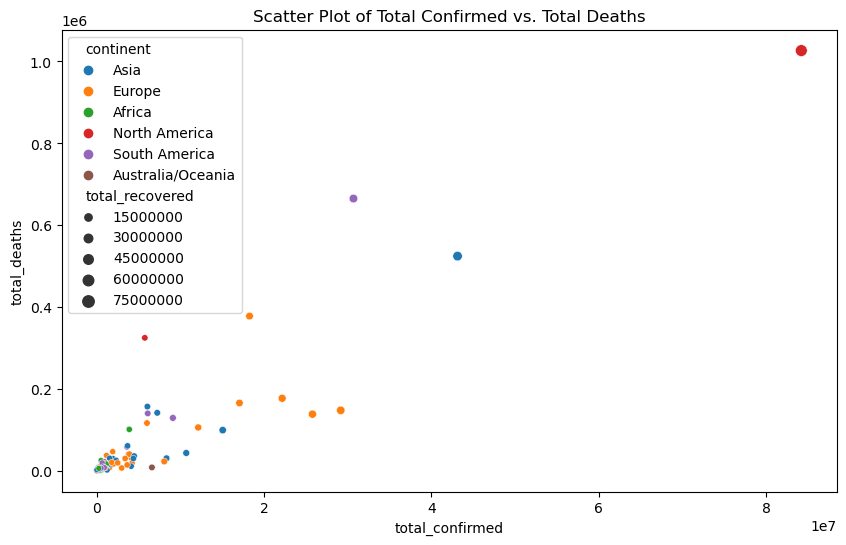

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=covid_df, x='total_confirmed', y='total_deaths', hue='continent', size='total_recovered')
plt.title('Scatter Plot of Total Confirmed vs. Total Deaths')
plt.show()


highest amout of death is observed in north america 

In [23]:
# Country-wise Analysis
country_wise_stats = covid_df.groupby('country').agg({
    'total_confirmed': 'sum',
    'total_deaths': 'sum',
    'total_recovered': 'sum'
}).reset_index()

# Identify countries with the highest and lowest numbers in each category
highest_confirmed = country_wise_stats.nlargest(5, 'total_confirmed')
lowest_confirmed = country_wise_stats.nsmallest(5, 'total_confirmed')

highest_deaths = country_wise_stats.nlargest(5, 'total_deaths')
lowest_deaths = country_wise_stats.nsmallest(5, 'total_deaths')

highest_recovered = country_wise_stats.nlargest(5, 'total_recovered')
lowest_recovered = country_wise_stats.nsmallest(5, 'total_recovered')

# Display the results
print("Countries with the highest total confirmed cases:")
print(highest_confirmed[['country', 'total_confirmed']])

print("\nCountries with the lowest total confirmed cases:")
print(lowest_confirmed[['country', 'total_confirmed']])

print("\nCountries with the highest total deaths:")
print(highest_deaths[['country', 'total_deaths']])

print("\nCountries with the lowest total deaths:")
print(lowest_deaths[['country', 'total_deaths']])

print("\nCountries with the highest total recovered cases:")
print(highest_recovered[['country', 'total_recovered']])

print("\nCountries with the lowest total recovered cases:")
print(lowest_recovered[['country', 'total_recovered']])


Countries with the highest total confirmed cases:
     country  total_confirmed
124      USA         84209473
53     India         43121599
16    Brazil         30682094
40    France         29160802
42   Germany         25780226

Countries with the lowest total confirmed cases:
                       country  total_confirmed
102  Saint Pierre And Miquelon             2739
4                     Anguilla             2984
63                    Kiribati             3093
91                       Palau             4879
122   Turks And Caicos Islands             6046

Countries with the highest total deaths:
    country  total_deaths
124     USA     1026646.0
16   Brazil      664920.0
53    India      524214.0
99   Russia      377670.0
78   Mexico      324465.0

Countries with the lowest total deaths:
                       country  total_deaths
102  Saint Pierre And Miquelon           1.0
91                       Palau           6.0
4                     Anguilla           9.0
63           

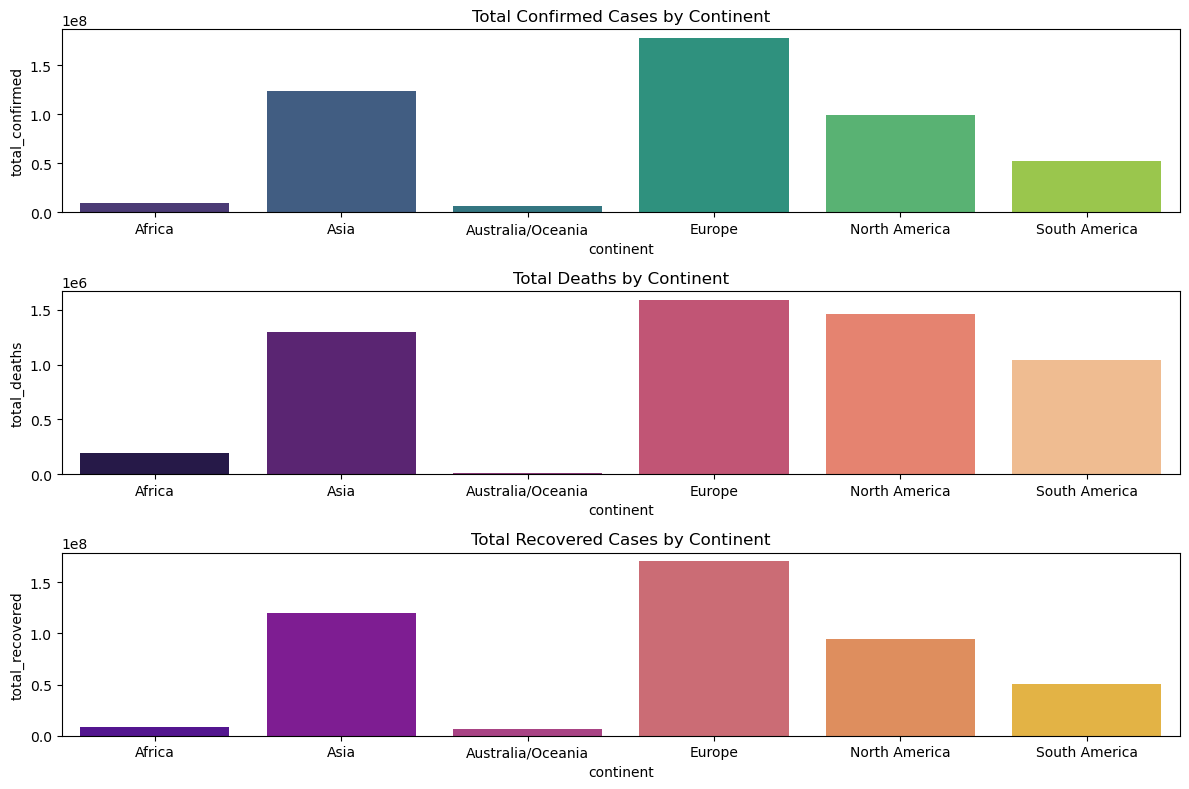

In [24]:
# Regional Comparison
region_wise_stats = covid_df.groupby('continent').agg({
    'total_confirmed': 'sum',
    'total_deaths': 'sum',
    'total_recovered': 'sum'
}).reset_index()

# Visualize regional trends using bar plots
plt.figure(figsize=(12, 8))

# Total Confirmed Cases
plt.subplot(3, 1, 1)
sns.barplot(data=region_wise_stats, x='continent', y='total_confirmed', palette='viridis')
plt.title('Total Confirmed Cases by Continent')

# Total Deaths
plt.subplot(3, 1, 2)
sns.barplot(data=region_wise_stats, x='continent', y='total_deaths', palette='magma')
plt.title('Total Deaths by Continent')

# Total Recovered Cases
plt.subplot(3, 1, 3)
sns.barplot(data=region_wise_stats, x='continent', y='total_recovered', palette='plasma')
plt.title('Total Recovered Cases by Continent')

plt.tight_layout()
plt.show()


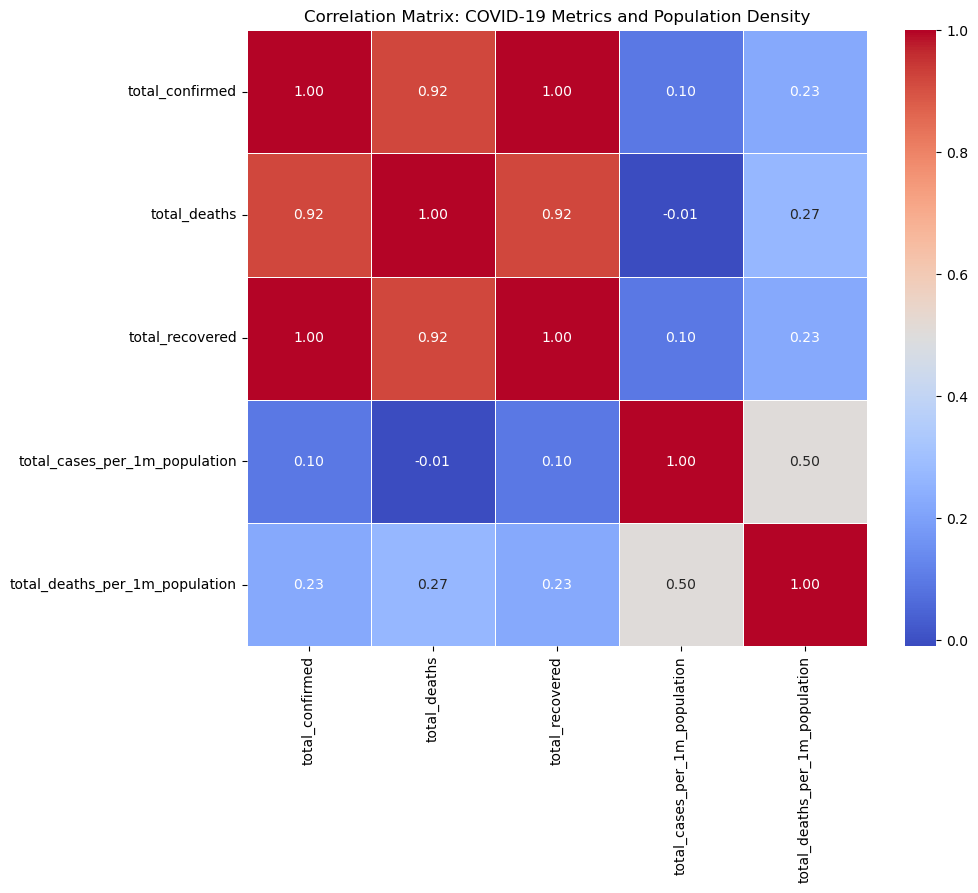

In [25]:
#population density correlates with the spread 
correlation_matrix = covid_df[['total_confirmed', 'total_deaths', 'total_recovered', 'total_cases_per_1m_population', 'total_deaths_per_1m_population']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix: COVID-19 Metrics and Population Density')
plt.show()
